# <center> Eindimensionales Zellteilungsmodell
### <center> [AG Supramolekulare und zelluläre Simulationen](https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/) **<center> (Prof. Fischer)**
**<center> CCTB, Fakultät für Biologie, Universität Würzburg**
**<center> Fragen und Anregungen gerne an sabine.fischer@uni-wuerzburg.de**

## Pakete laden

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Anfangsbedingungen und Parameterwerte

In [ ]:
cells=[[11,0.5]] #Jede Zelle wird durch ihre Position und ihren Radius beschrieben.

In [ ]:
limsx=(0,22) #Grenzwerte für die x- und y-Achsen
limsy=(0,2)
height=2 #die 'Höhe' der Zelle fürs Plotten

## Graphische Darstellung

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
[position,radius]=cells[0]
ax1.add_patch(
    plt.Rectangle((position-radius, 0), 2*radius, height, edgecolor='black',alpha=0.3))
plt.xlim(limsx)
plt.ylim(limsy)
plt.show()

## 1. Zellwachstum

In [ ]:
cells=[[11,1]] #Zellen verdoppeln Ihren Radius

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
[position,radius]=cells[0]
ax1.add_patch(
    plt.Rectangle((position-radius, 0), 2*radius, height, edgecolor='black',alpha=0.3))
plt.xlim(limsx)
plt.ylim(limsy)
plt.show()

**Aufgabe: Können Sie das als Rechenvorschrift schreiben?**

**Testen Sie Ihre Rechenvorschrift für eine und mehrere Zellen und plotten Sie das Ergebnis. (z.B. für cells=[[11,0.5]] oder cells=[[4,0.5],[11,0.5]])**

Tipp: um mehrere Zellen zu Plotten, erzetzen Sie einfach die Zeilen <br/>
````Python
[position,radius]=cells[0] 
ax1.add_patch(
    plt.Rectangle((position-radius, 0), 2*radius, height, edgecolor='black',alpha=0.3))
````
durch
````Python
for [position,radius] in cells:
ax1.add_patch(
    plt.Rectangle((position-radius, 0), 2*radius, height, edgecolor='black',alpha=0.3))
````

**Statt den Zellradius auf einmal zu verdoppeln, verwenden sie das logistische Wachstumsmodell, d.h. insbesondere die Vorschrift**
````Python
radius=radius+dt*(radius*(1-radius)), 
````
**wobei dt ein Zeitschritt ist.**

**Testen Sie Ihre Rechenvorschrift für eine und mehrere Zellen und plotten Sie das Ergebnis nach 1000 Zeitschritten. (Wählen Sie dt=0.01.)**

## 2. Zellteilung

In [ ]:
cells=[[10.5,0.5],[11.5,0.5]] #Zellteilung: Neue position: alte Position + und - radius/2, neuer Radius ist die Hälfte des alten Radius

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
for [position,radius] in cells:
    ax1.add_patch(
        plt.Rectangle((position-radius, 0), 2*radius, 2, edgecolor='black',alpha=0.3))
plt.xlim(limsx)
plt.ylim(limsy)
plt.show()

**Aufgabe: Können Sie das als Rechenvorschrift schreiben?** 

**Testen Sie Ihre Rechenvorschrift für eine Zelle und plotten Sie das Ergebnis.** 

## 3. Mechanische Interaktionen

Ohne mechanische Interaktionen würden die Zellen irgendwann stark überlappen

**Aufgabe: Testen Sie z.B. Ihre Rechenvorschrift für das Zellwchstum für die Anfangsbedingung cells=[[10,0.5],[11,0.5]] und plotten Sie das Ergebnis nach 1000 Zeitschritten mit dt=0.01.<br/>
Das Ergebnis würde dann so aussehen:**
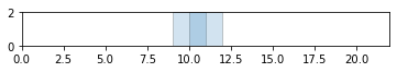

Für die mechanischen Interaktionen benötigt man eine Kraft, die abstoßend wirkt, wenn die Zellen überlappen, anziehend falls die Zellen nah beisammen sind und verschwindet wenn zwei Zellen weit auseinander sind.
Wir verwenden eine Kraft, die auf dem Morse-Potential beruht.

Anfangswerte für Zellen

In [ ]:
cells=[[8.25, 0.5],
 [9.25, 0.5],
 [10.75, 0.5],
 [11.75, 0.5]]

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
for [position,radius] in cells:
    ax1.add_patch(
        plt.Rectangle((position-radius, 0), 2*radius, 2, edgecolor='black',alpha=0.3))
plt.xlim(limsx)
plt.ylim(limsy)
plt.title('cell growth and displacement')
plt.show()        

Parameterwerte

In [ ]:
F0=0.01
alpha=3
sigma=0.8

dt=0.01

**Aufgabe: Schauen Sie sich den Code genau an. An welcher Stelle wird das Zellwachstum berechnet? Wo wird die Distanz zwichen zwei Zellen berechnet und wo findet sich die Kraft?**

In [ ]:
for timeStep in range(10000):
    for (i,[position,radius]) in enumerate(cells):
        radius=radius+dt*(radius*(1-radius))
        cells[i]=[position,radius]

    cellsOld=cells.copy()
    for (i,[position,radius]) in enumerate(cells):
        forceList=[]
        for j in range(len(cellsOld)):
            dist=cellsOld[j][0]-position
            radiusSum=cellsOld[j][1]+radius
            
            if dist==0:
                norm_dist=1 #to avoid error message because of divison by zero
            else: norm_dist=abs(dist) 
           
            if dist>radiusSum:
                 F=0
            else: F = F0*2*alpha*(np.exp(-alpha*(norm_dist-radiusSum*sigma)) 
                                   - np.exp(-2*alpha*(norm_dist-radiusSum*sigma)))*dist/norm_dist
            forceList.append(F)
      
        force=np.sum(forceList)
        position=position+dt*force
        cells[i]=[position,radius] 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
for [position,radius] in cells:
    ax1.add_patch(
        plt.Rectangle((position-radius, 0), 2*radius, 2, edgecolor='black', alpha=0.3))
plt.xlim(limsx)
plt.ylim(limsy)
plt.title('cell growth and displacement')
plt.show()        

**Lassen sie sich die neuen Positionen und Radien der Zellen ausgeben:**

**Aufgabe: Für ganz Mutige ;-) <br/>
Setzen Sie die Code-Schnipsel zusammen.
Starten Sie mit cells=[[11,0.5]].
Lassen Sie die Zelle teilen und machen dann 1000 Zeitschritte "growth and displacement", danach wieder eine Zellteilung usw. und das ganze dreimal. Plotten Sie das Ergebnis.**

Tipp: bei mir sehen die Plots für die drei Zeitschritte so aus:
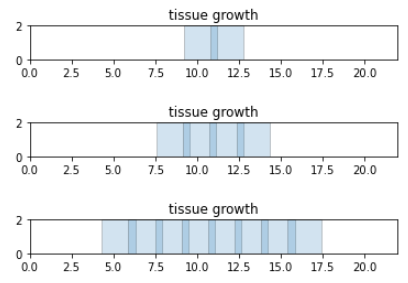